In [1]:
library(tidyr)
library(dplyr) 
library(gplots)
library(gridExtra)
library(ggplot2) 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
options(repr.plot.width=8, repr.plot.height=6)

In [3]:
df = read.csv("stat_dataset.csv", sep = ",")
head(df)

X,device_brand,os,screen_size,X4g,X5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,3.720275,yes,no,3.605551,1.731322,64,3,9.219591,0.006849315,2020,127,4.307572,4.715100
1,Honor,Android,4.023023,yes,yes,3.605551,2.684077,128,8,9.687109,0.004694836,2020,325,5.162097,5.519018
2,Honor,Android,3.960345,yes,yes,3.605551,2.106805,128,8,9.655799,0.004694836,2020,162,5.111084,5.884631
3,Honor,Android,3.813117,yes,no,3.605551,2.106805,64,3,9.888398,0.005405405,2020,293,4.389995,4.947837
4,Honor,Android,3.911944,yes,no,3.605551,2.106805,64,4,9.590960,0.005681818,2020,223,4.413889,5.060694
5,Honor,Android,3.642696,yes,no,2.828427,1.731322,32,2,9.219591,0.006944444,2020,234,3.878259,4.518958


In [4]:
str(df)

'data.frame':	2818 obs. of  16 variables:
 $ X                    : int  0 1 2 3 4 5 6 7 8 9 ...
 $ device_brand         : Factor w/ 33 levels "Acer","Alcatel",..: 11 11 11 11 11 11 11 11 11 11 ...
 $ os                   : Factor w/ 4 levels "Android","Others",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ screen_size          : num  3.72 4.02 3.96 3.81 3.91 ...
 $ X4g                  : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ X5g                  : Factor w/ 2 levels "no","yes": 1 2 2 1 1 1 1 1 1 1 ...
 $ rear_camera_mp       : num  3.61 3.61 3.61 3.61 3.61 ...
 $ front_camera_mp      : num  1.73 2.68 2.11 2.11 2.11 ...
 $ internal_memory      : num  64 128 128 64 64 32 64 128 128 64 ...
 $ ram                  : num  3 8 8 3 4 2 4 6 6 3 ...
 $ battery              : num  9.22 9.69 9.66 9.89 9.59 ...
 $ weight               : num  0.00685 0.00469 0.00469 0.00541 0.00568 ...
 $ release_year         : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ days_used            

In [5]:
sum(is.na(df))

[1] 0

In [6]:
df$weight <- df$weight * 1000
df$days_used <- df$days_used / 10
df$normalized_used_price <- df$normalized_used_price * 10
# relativity doesn't change - just done to make sure all values are in the same range as it's better to do so

In [7]:
summary(df)

       X           device_brand        os        screen_size     X4g      
 Min.   :   0.0   Others : 423   Android:2710   Min.   :3.132   no : 845  
 1st Qu.: 704.2   Samsung: 262   Others :  20   1st Qu.:3.502   yes:1973  
 Median :1408.5   Huawei : 211   Windows:  64   Median :3.519             
 Mean   :1408.5   LG     : 168   iOS    :  24   Mean   :3.555             
 3rd Qu.:2112.8   Lenovo : 140                  3rd Qu.:3.804             
 Max.   :2817.0   ZTE    : 135                  Max.   :4.279             
                  (Other):1479                                            
  X5g       rear_camera_mp   front_camera_mp internal_memory        ram        
 no :2741   Min.   :0.5477   Min.   :0.261   Min.   :   0.01   Min.   : 0.250  
 yes:  77   1st Qu.:2.8284   1st Qu.:1.076   1st Qu.:  16.00   1st Qu.: 4.000  
            Median :3.4641   Median :1.731   Median :  32.00   Median : 4.000  
            Mean   :3.0973   Mean   :1.614   Mean   :  49.21   Mean   : 4.091  


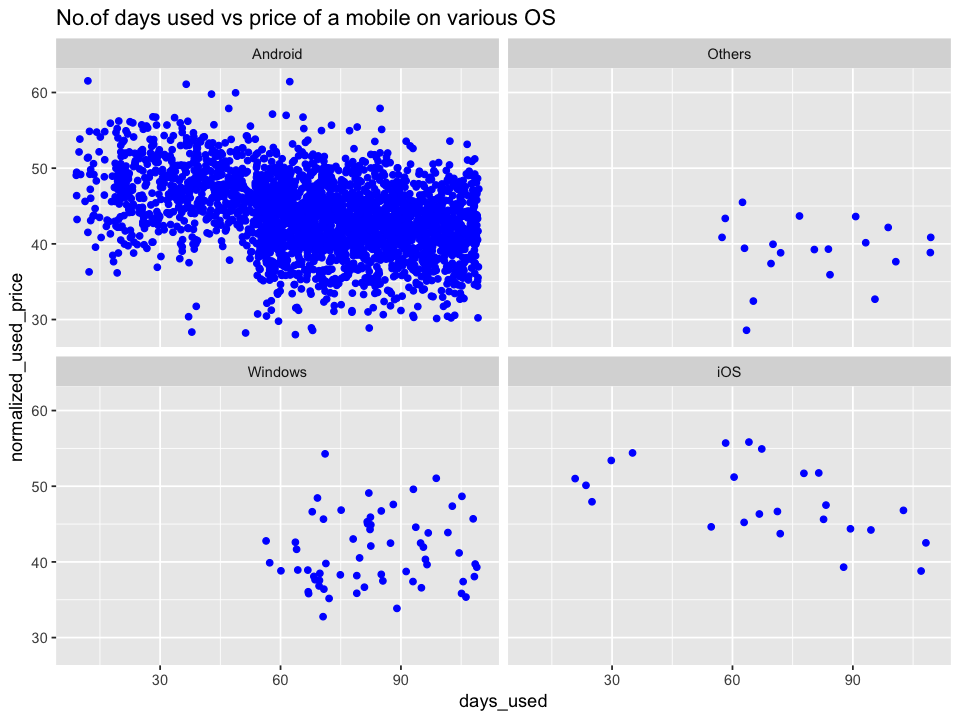

In [8]:
ggplot(data = df) + 
  geom_point( mapping = aes(x = days_used, y = normalized_used_price), color = "blue") + 
  facet_wrap( ~ df$os, nrow = 2) +
  labs(title = "No.of days used vs price of a mobile on various OS")

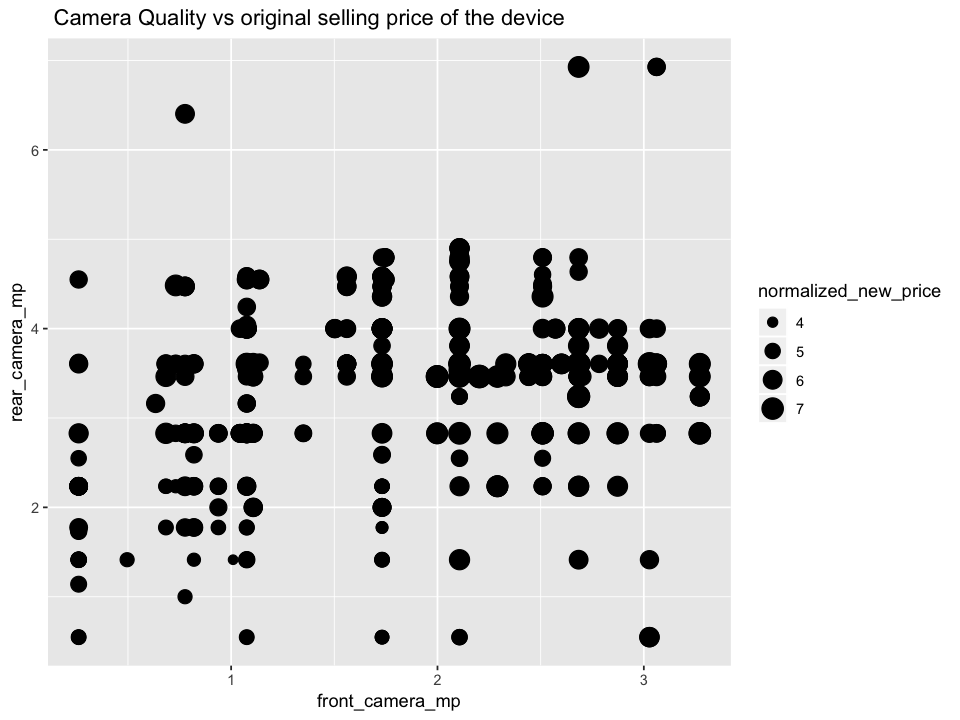

In [9]:
df %>% ggplot(aes(x = front_camera_mp, y = rear_camera_mp, size = normalized_new_price)) +
  geom_point() +
  labs(title = " Camera Quality vs original selling price of the device")

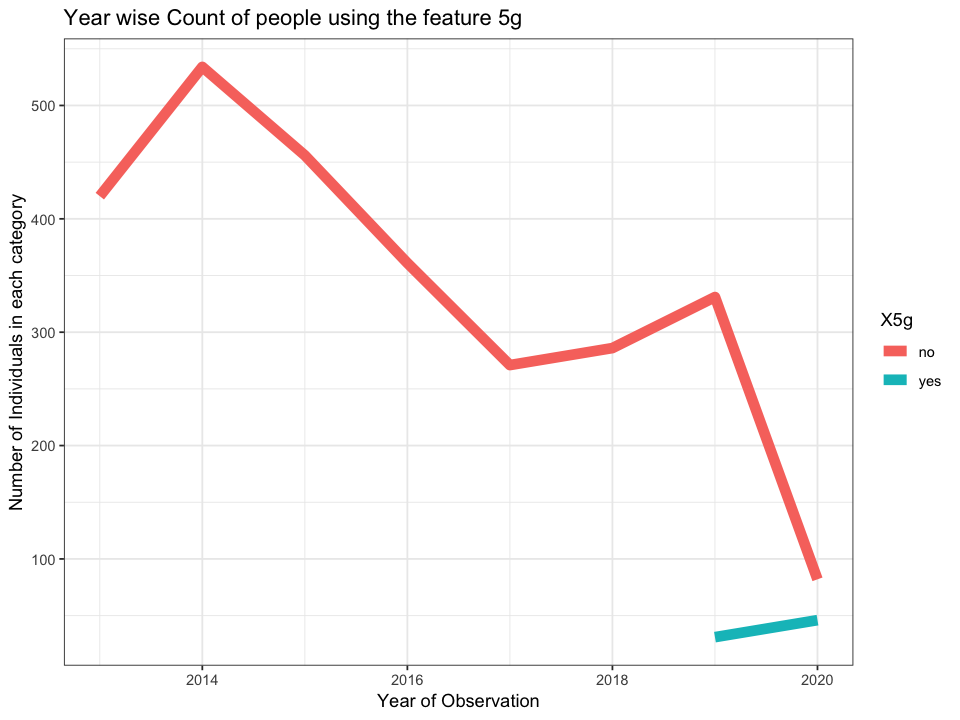

In [10]:
#library(tidyverse)
yearly_5g_phones_counts <- df %>% count(release_year, X5g)

ggplot(data = yearly_5g_phones_counts, mapping = aes(x = release_year, y = n , color = X5g)) +
  geom_line(size = 3) +
  labs(title = "Year wise Count of people using the feature 5g", x = "Year of Observation", y = "Number of Individuals in each category") +
  theme_bw() 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


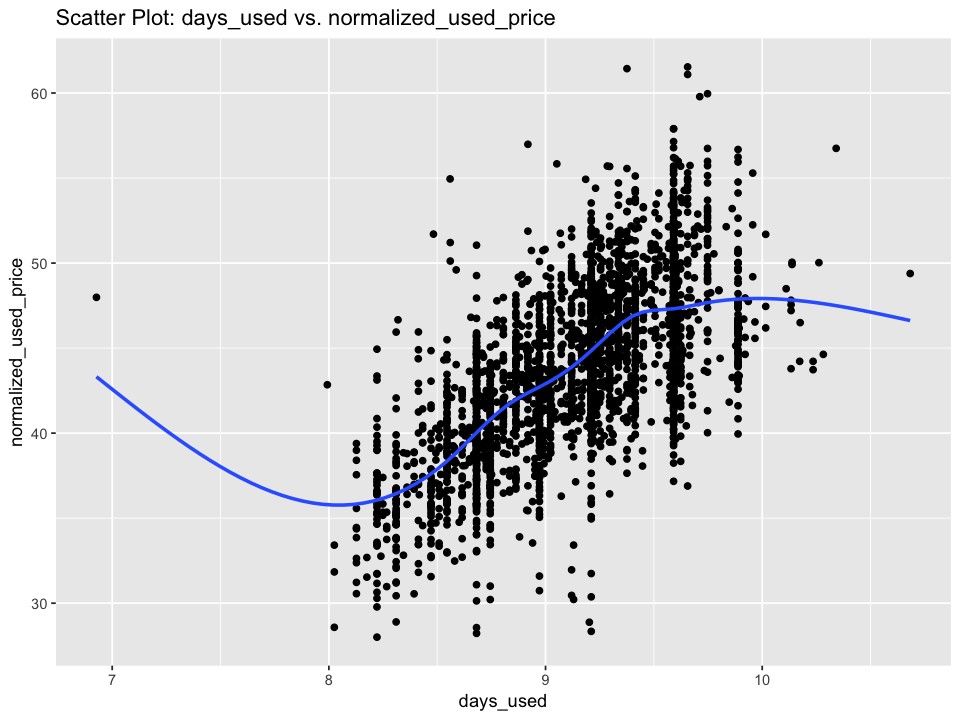

In [11]:
# Scatter plot
ggplot(data = df, aes(x = battery, y = normalized_used_price)) +
  geom_point() + geom_smooth(se = FALSE) +
  labs(x = "days_used", y = "normalized_used_price") +
  ggtitle("Scatter Plot: days_used vs. normalized_used_price")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


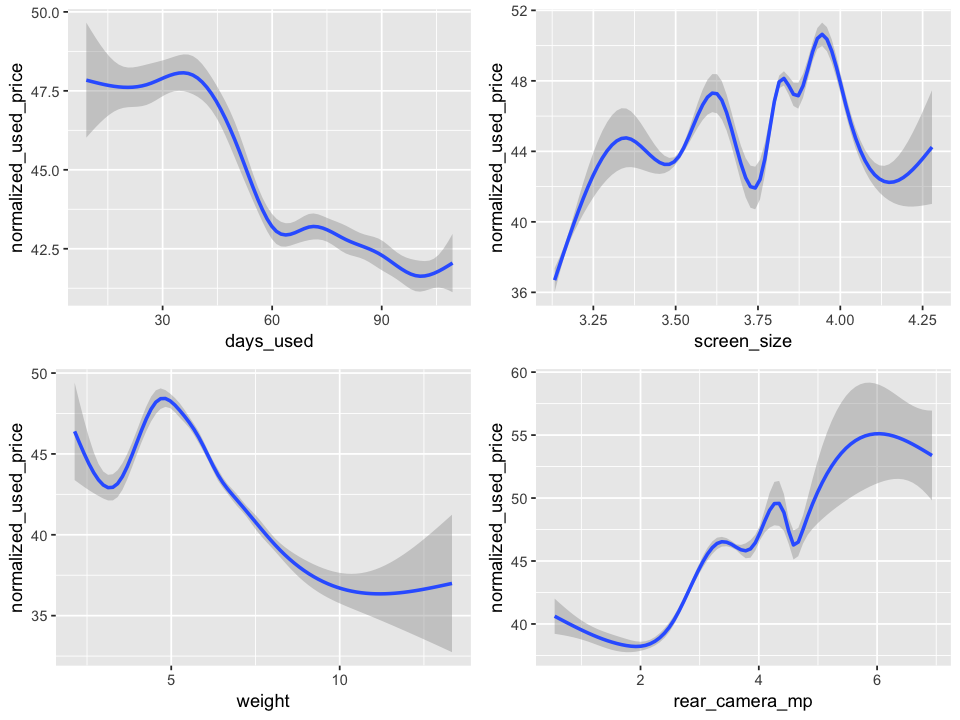

In [12]:
p = ggplot(data = df) 
p1 = p + geom_smooth(mapping = aes(x = days_used , y = normalized_used_price)) 
p2 = p + geom_smooth(mapping = aes(x = screen_size, y = normalized_used_price))
p3 = p + geom_smooth(mapping = aes(x = weight, y = normalized_used_price))
p4 = p + geom_smooth(mapping = aes(x = rear_camera_mp, y = normalized_used_price))
grid.arrange(p1,p2,p3,p4, nrow = 2)

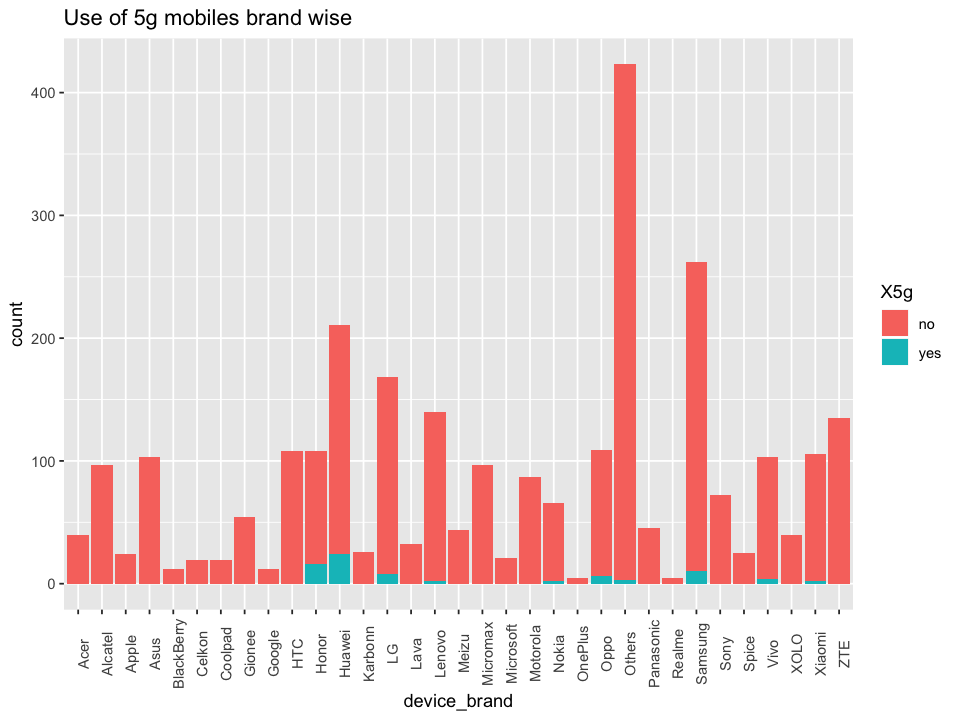

In [13]:
ggplot(data = df) +
  geom_bar(mapping = aes(x = device_brand, fill = X5g)) +
  labs(title = 'Use of 5g mobiles brand wise') + theme(axis.text.x = element_text(angle = 90))

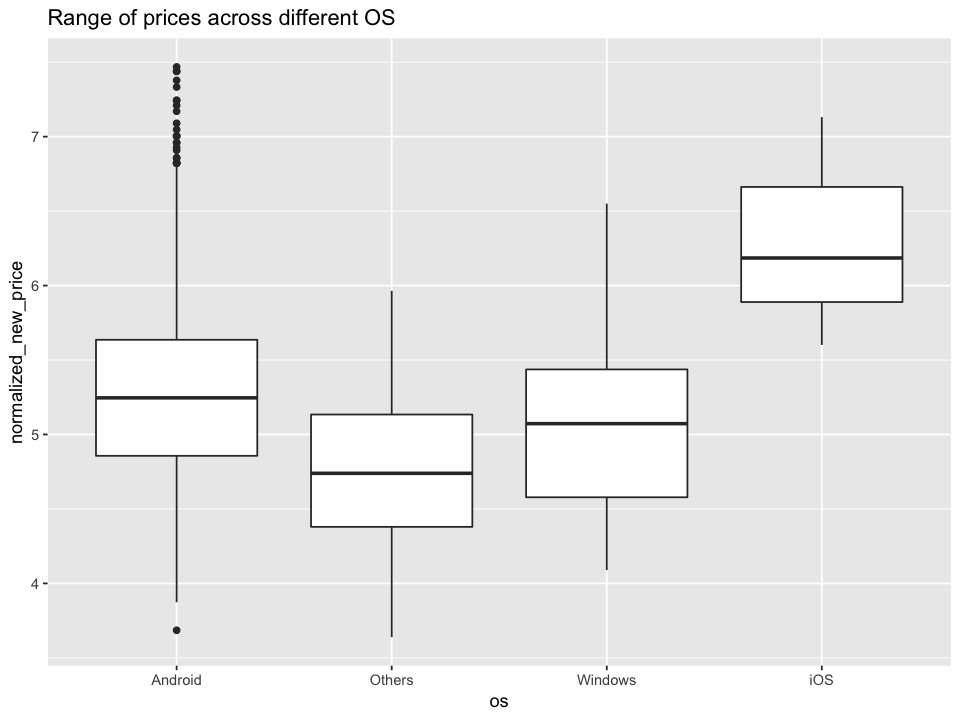

In [14]:
ggplot(data = df, mapping = aes(x = os, y = normalized_new_price)) +
  geom_boxplot() +
  labs(title = 'Range of prices across different OS')

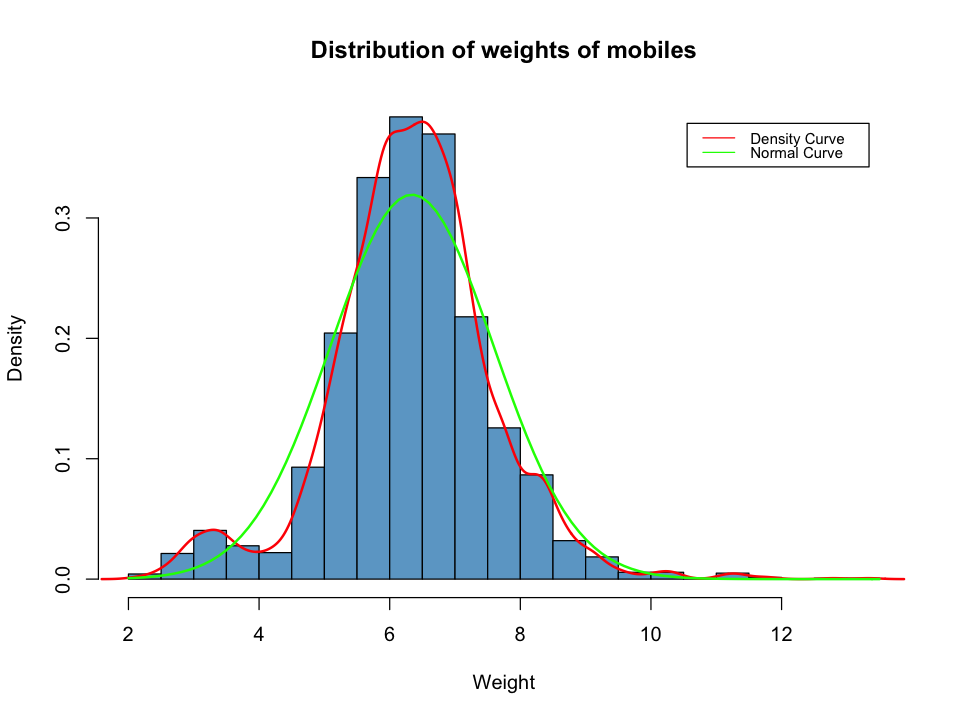

In [15]:
m <- mean(df$weight)
std <- sqrt(var(df$weight))
hist(df$weight, col = "skyblue3", breaks = 30, prob = TRUE,
     xlab = "Weight",
     main = "Distribution of weights of mobiles") 
lines(density(df$weight), col = "red", lwd = 2)
curve(dnorm(x, mean = m, sd = std), col = "green", lwd = 2, add = TRUE, 
      yaxt = "n")
legend("topright",   
       inset = 0.05,
       legend = c("Density Curve", "Normal Curve"),
       lty = 1,
       col = c("red", "green"),
       cex = .75)

corrplot 0.84 loaded


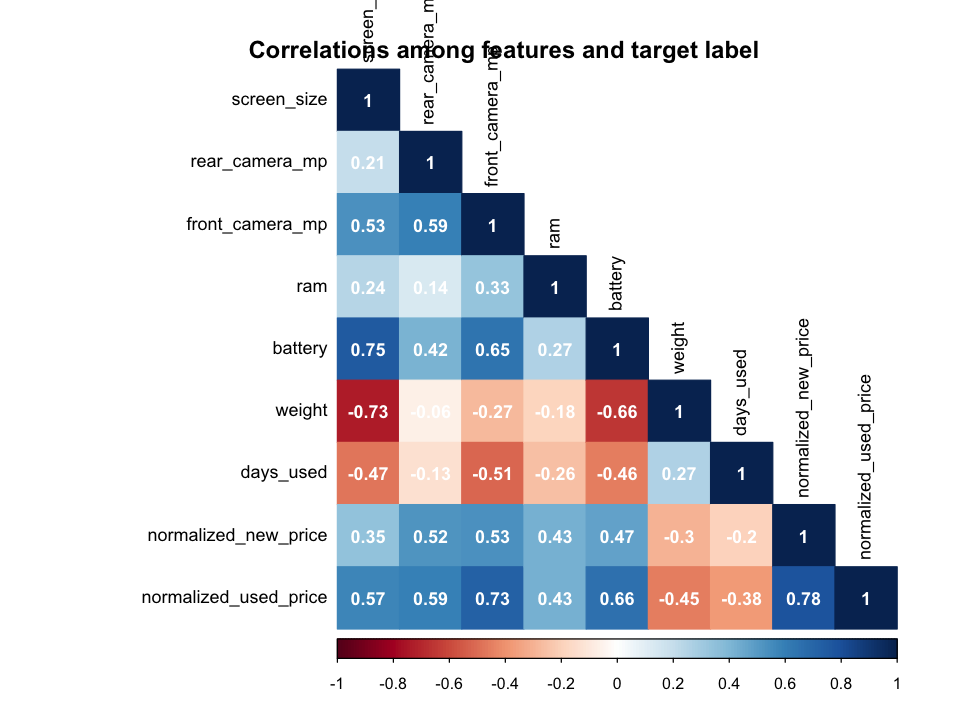

In [16]:
library(corrplot)
cor_matrix <- cor(df[, c("screen_size", "rear_camera_mp", "front_camera_mp", "ram", "battery", "weight", "days_used", "normalized_new_price", "normalized_used_price")])

corrplot(cor_matrix, method = "color", type = "lower", 
         tl.col = "black", tl.srt = 90, tl.cex = 0.9,
         addCoef.col = "white", number.cex = 0.9)

title("Correlations among features and target label")

## Statistical techniques

In [17]:
df <- df[,-c(1,2,3,5,6,7,8,9,10,13)]

In [18]:
head(df)

screen_size,battery,weight,days_used,normalized_used_price,normalized_new_price
3.720275,9.219591,6.849315,12.7,43.07572,4.715100
4.023023,9.687109,4.694836,32.5,51.62097,5.519018
3.960345,9.655799,4.694836,16.2,51.11084,5.884631
3.813117,9.888398,5.405405,29.3,43.89995,4.947837
3.911944,9.590960,5.681818,22.3,44.13889,5.060694
3.642696,9.219591,6.944444,23.4,38.78259,4.518958


In [19]:
str(df)

'data.frame':	2818 obs. of  6 variables:
 $ screen_size          : num  3.72 4.02 3.96 3.81 3.91 ...
 $ battery              : num  9.22 9.69 9.66 9.89 9.59 ...
 $ weight               : num  6.85 4.69 4.69 5.41 5.68 ...
 $ days_used            : num  12.7 32.5 16.2 29.3 22.3 23.4 21.9 16.1 32.7 26.8 ...
 $ normalized_used_price: num  43.1 51.6 51.1 43.9 44.1 ...
 $ normalized_new_price : num  4.72 5.52 5.88 4.95 5.06 ...


In [20]:
set.seed(1)
n = floor(0.8 * nrow(df)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(df)), size = n) #randomly sample indicies to be included in the training set
train = df[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = df[-index, ] #set the testing set to be the remaining rows

In [21]:
str(train)

'data.frame':	2254 obs. of  6 variables:
 $ screen_size          : num  3.8 3.5 3.5 3.52 3.15 ...
 $ battery              : num  9.59 9.25 8.86 9.02 8.31 ...
 $ weight               : num  5.62 7.14 6.99 5.46 6.83 ...
 $ days_used            : num  83.9 78.9 61.5 82.3 85.5 ...
 $ normalized_used_price: num  51.4 40.5 45.9 45.8 37.5 ...
 $ normalized_new_price : num  5.99 5.07 5.14 5.3 4.37 ...


In [22]:
str(test)

'data.frame':	564 obs. of  6 variables:
 $ screen_size          : num  3.64 3.72 3.52 3.82 3.82 ...
 $ battery              : num  9.22 9.22 9.24 9.59 9.59 ...
 $ weight               : num  6.94 6.85 6.67 5.21 5.49 ...
 $ days_used            : num  23.4 53.2 49.9 9.1 29.9 16.1 9.3 22.3 33.3 28.4 ...
 $ normalized_used_price: num  38.8 42.5 46 49.1 48.2 ...
 $ normalized_new_price : num  4.52 4.79 5.4 5.52 5.4 ...


In [23]:
mod_1 = lm(normalized_used_price ~ ., data = train)
summary(mod_1)


Call:
lm(formula = normalized_used_price ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3000 -1.5382  0.2853  1.8107 12.3563 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -16.040395   2.075993  -7.727 1.65e-14 ***
screen_size            3.368478   0.356234   9.456  < 2e-16 ***
battery                2.379453   0.211456  11.253  < 2e-16 ***
weight                 0.045471   0.064632   0.704    0.482    
days_used             -0.015674   0.002597  -6.036 1.84e-09 ***
normalized_new_price   5.114032   0.100138  51.070  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.493 on 2248 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7492 
F-statistic:  1347 on 5 and 2248 DF,  p-value: < 2.2e-16


In [24]:
mod_2 = lm(normalized_used_price ~ screen_size + battery + days_used + normalized_new_price , data = train)
summary(mod_2)


Call:
lm(formula = normalized_used_price ~ screen_size + battery + 
    days_used + normalized_new_price, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3572 -1.5315  0.2845  1.8056 12.3622 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -14.934848   1.356487 -11.010  < 2e-16 ***
screen_size            3.243637   0.308860  10.502  < 2e-16 ***
battery                2.340262   0.203964  11.474  < 2e-16 ***
days_used             -0.016008   0.002552  -6.272 4.27e-10 ***
normalized_new_price   5.115382   0.100109  51.098  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.492 on 2249 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7492 
F-statistic:  1684 on 4 and 2249 DF,  p-value: < 2.2e-16


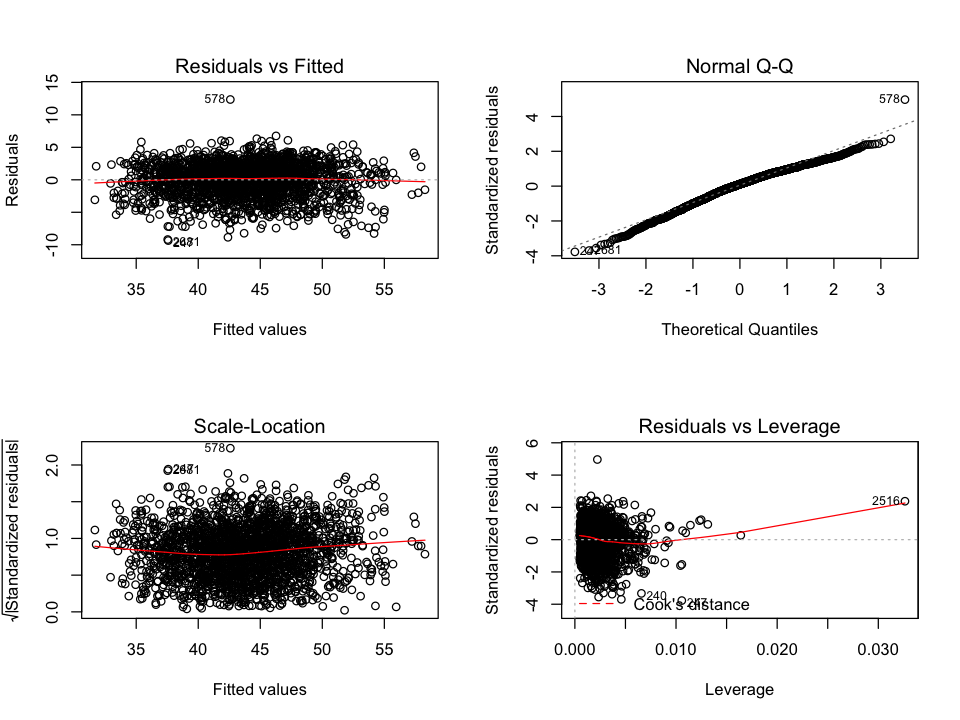

In [26]:
par(mfrow = c(2,2))
plot(mod_2)
# There does not appear to be any evidence of serious violations of linearity, constant variance,
#or independence. There appears to be very slight deviation from normality at the edges.

integer(0)

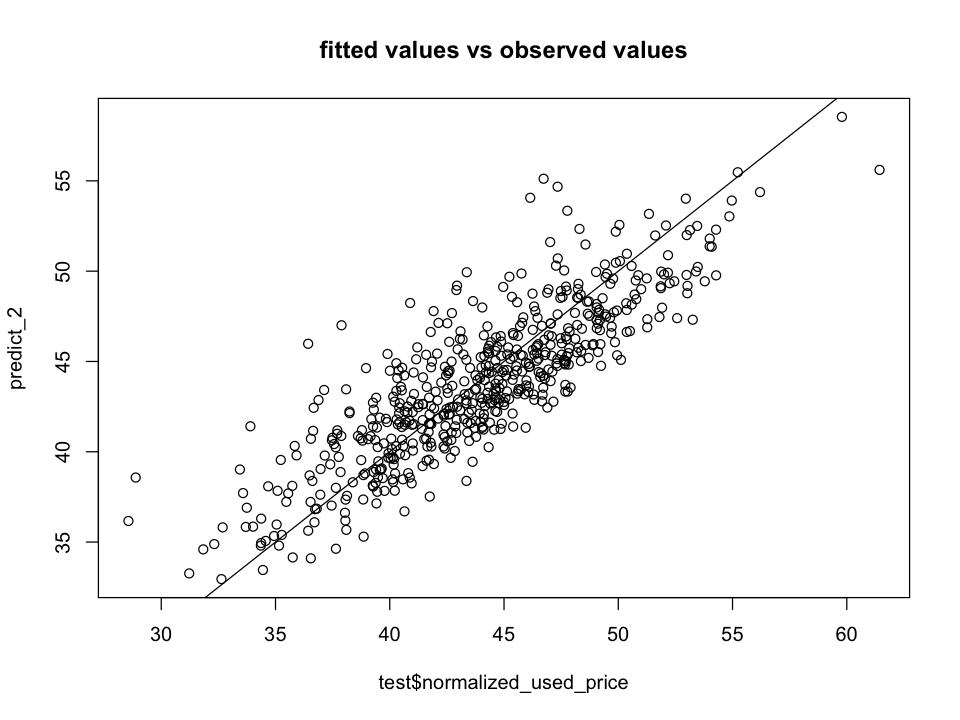

In [27]:
plot(test$normalized_used_price, predict_2,main = 'fitted values vs observed values') + abline(0,1)

In [28]:
# mod_2_i means taking out column i from those columns which are in mod_1

In [29]:
mod_2_days_used = lm(normalized_used_price ~ screen_size + battery + normalized_new_price , data = train)
summary(mod_2_days_used)


Call:
lm(formula = normalized_used_price ~ screen_size + battery + 
    normalized_new_price, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2110 -1.5771  0.3262  1.7984 12.5097 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -19.3925     1.1652  -16.64   <2e-16 ***
screen_size            3.6590     0.3042   12.03   <2e-16 ***
battery                2.5526     0.2028   12.59   <2e-16 ***
normalized_new_price   5.1039     0.1009   50.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.514 on 2250 degrees of freedom
Multiple R-squared:  0.7453,	Adjusted R-squared:  0.745 
F-statistic:  2195 on 3 and 2250 DF,  p-value: < 2.2e-16


In [30]:
predict_3<-predict(mod_2_days_used, newdata = test)
rss_3 = sum(mod_2_days_used$residuals^2)
mspe_3 <- sqrt(mean((test$normalized_used_price - predict_3)**2 ))
print(rss_3)
print(mspe_3)

[1] 14214.95
[1] 2.642874


In [31]:
predict_1<-predict(mod_1, newdata = test)
predict_2<-predict(mod_2, newdata = test)
predict_3<-predict(mod_2_days_used, newdata = test)
mspe1 = with(test, mean((predict_1 - normalized_used_price)^2))
mspe2 = with(test, mean((predict_2 - normalized_used_price)^2))
mspe3 = with(test, mean((predict_3 - normalized_used_price)^2))
sprintf("MSPE for mod_1 = %s", mspe1)
sprintf('MSPE for mod_2 = %s', mspe2)
sprintf('MSPE for mod_2_days_used = %s', mspe3)

[1] "MSPE for mod_1 = 6.73007156190804"

[1] "MSPE for mod_2 = 6.73934980238473"

[1] "MSPE for mod_2_days_used = 6.98478491047044"

In [32]:
anova(mod_2,mod_1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2249,13970.60,NA,NA,NA,NA
2248,13967.52,1,3.075449,0.4949775,0.4817882


In [33]:
anova(mod_2_days_used, mod_1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2250,14214.95,NA,NA,NA,NA
2248,13967.52,2,247.425,19.91089,2.682308e-09


In [34]:
anova(mod_2_days_used, mod_2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2250,14214.95,NA,NA,NA,NA
2249,13970.60,1,244.3496,39.33563,4.26651e-10


In [35]:
summary(lm(normalized_used_price ~ weight, data = train))


Call:
lm(formula = normalized_used_price ~ weight, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.5851  -3.0109   0.0251   3.0519  15.5252 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 55.44418    0.47928  115.68   <2e-16 ***
weight      -1.84727    0.07407  -24.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.407 on 2252 degrees of freedom
Multiple R-squared:  0.2164,	Adjusted R-squared:  0.2161 
F-statistic:   622 on 1 and 2252 DF,  p-value: < 2.2e-16


In [36]:
summary(lm(normalized_used_price ~ weight + screen_size + normalized_new_price , data = train))


Call:
lm(formula = normalized_used_price ~ weight + screen_size + normalized_new_price, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1851  -1.6102   0.3621   1.8802  11.9857 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -6.72203    1.43969  -4.669  3.2e-06 ***
weight               -0.07348    0.06442  -1.141    0.254    
screen_size           6.13676    0.30982  19.808  < 2e-16 ***
normalized_new_price  5.53768    0.09813  56.430  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.6 on 2250 degrees of freedom
Multiple R-squared:  0.7275,	Adjusted R-squared:  0.7272 
F-statistic:  2003 on 3 and 2250 DF,  p-value: < 2.2e-16


## model selection

(Intercept),screen_size,battery,weight,days_used,normalized_new_price
TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,TRUE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,FALSE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


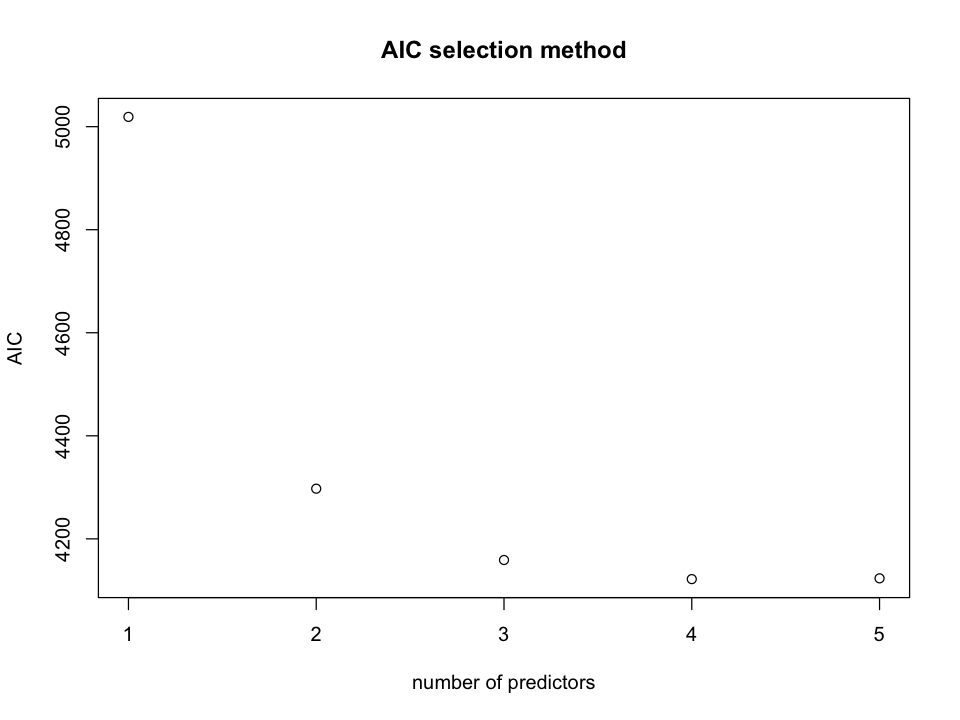

In [37]:
library(leaps)
n = dim(train)[1]; 
reg = regsubsets(normalized_used_price ~ ., data = train)
rs = summary(reg)
rs$which

AIC = 2*(2:6) + n*log(rs$rss/n) 
plot(AIC ~ I(1:5), xlab = "number of predictors", ylab = "AIC",main = 'AIC selection method')

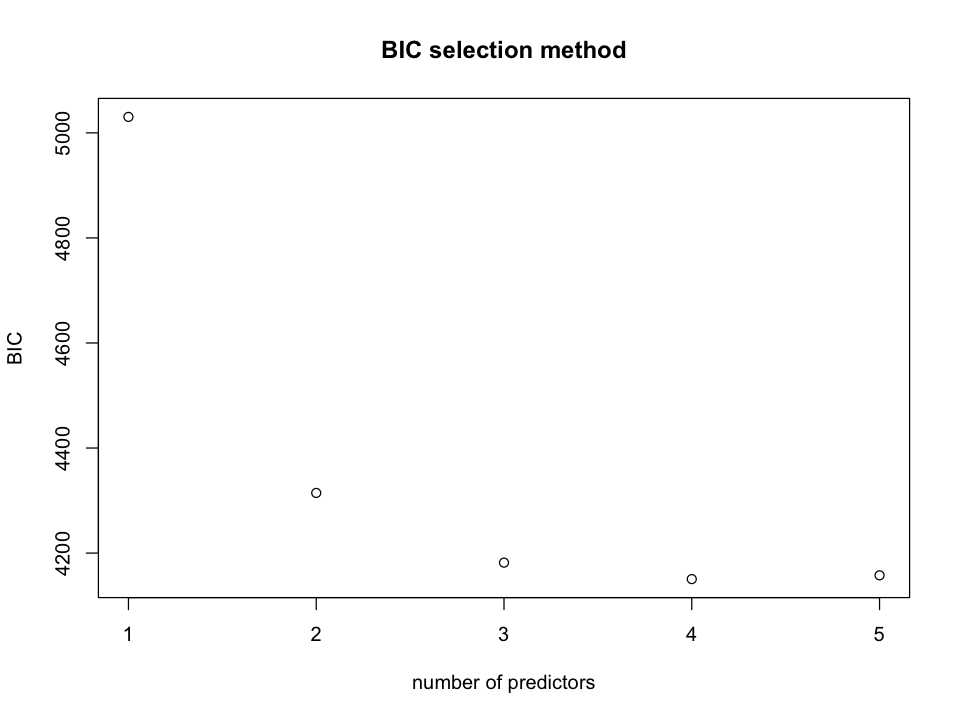

In [38]:
BIC = log(n)*(2:6) + n*log(rs$rss/n) 
plot(BIC ~ I(1:5), xlab = "number of predictors", ylab = "BIC",main = 'BIC selection method')

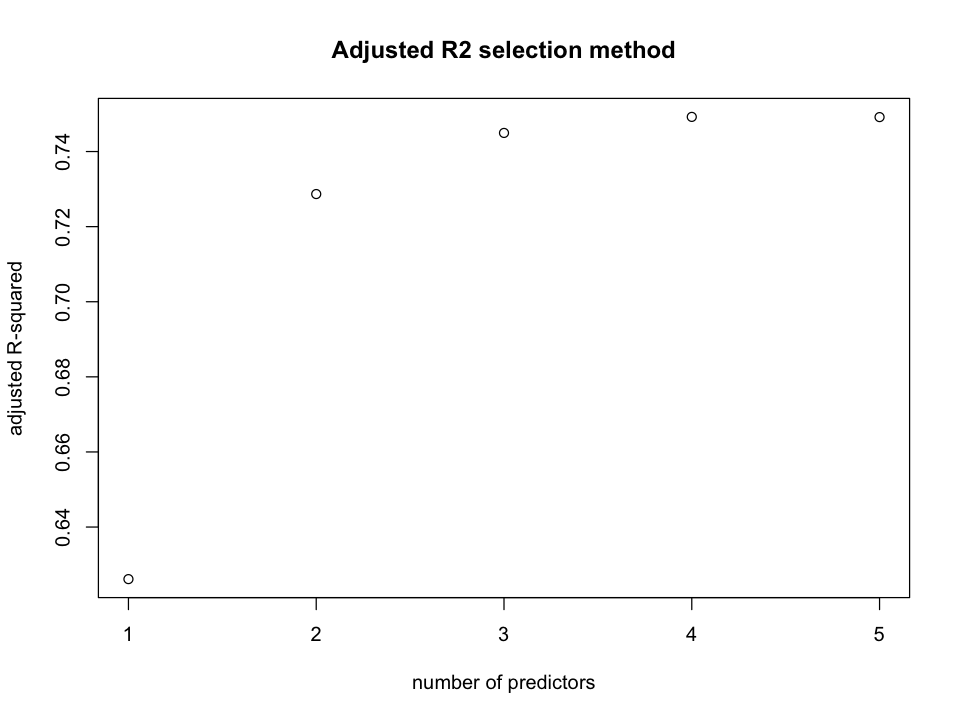

In [39]:
plot(1:5, rs$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared",main = 'Adjusted R2 selection method')

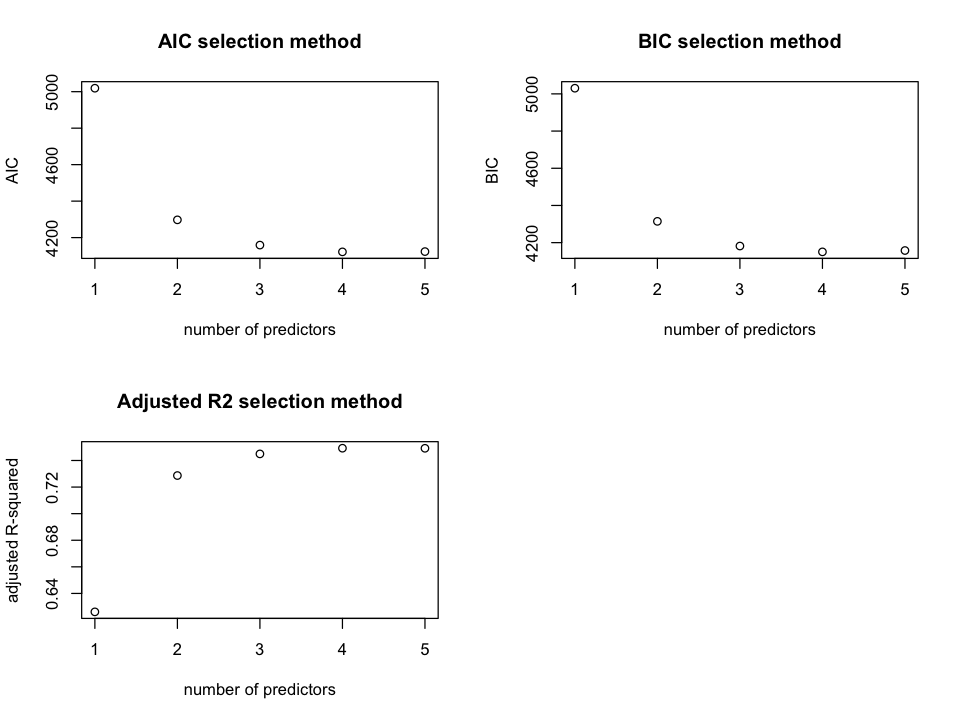

In [40]:
par(mfrow = c(2,2))
plot(AIC ~ I(1:5), xlab = "number of predictors", ylab = "AIC",main = 'AIC selection method')
plot(BIC ~ I(1:5), xlab = "number of predictors", ylab = "BIC",main = 'BIC selection method')
plot(1:5, rs$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared",main = 'Adjusted R2 selection method')

## GLM, GAM, ridge regression and Multi-collinearity

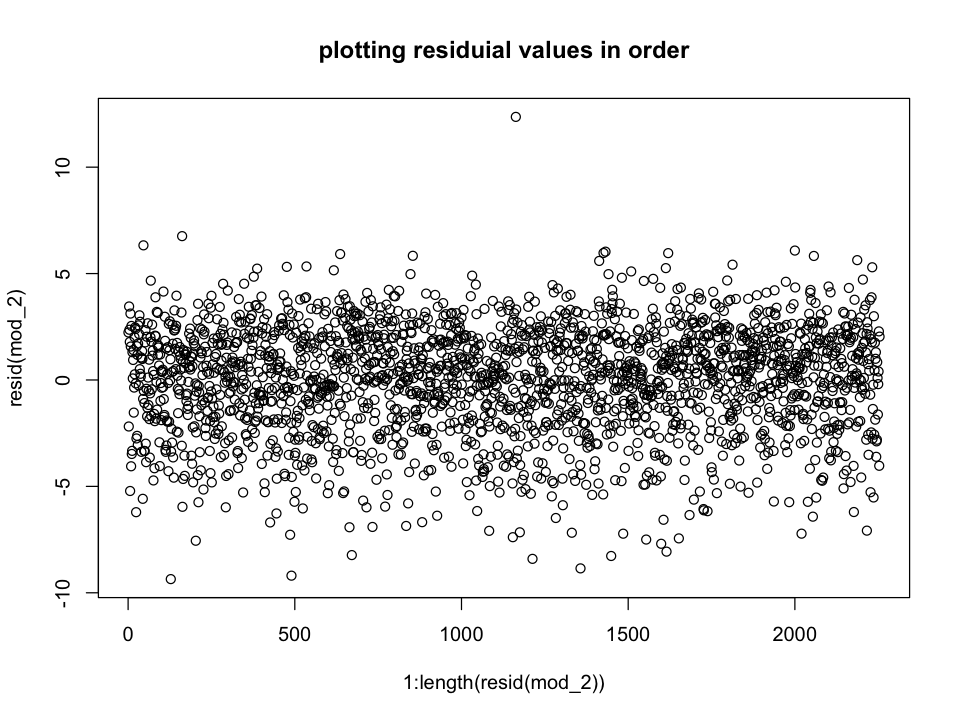

In [50]:
plot(1:length(resid(mod_2)), resid(mod_2), main = 'plotting residuial values in order')

In [42]:
library(car)
vif(mod_2)
# No multi-collinearity

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



screen_size              battery            days_used 
            2.442823             2.725962             1.316068 
normalized_new_price 
            1.308146

       Length Class  Mode   
coef   80     -none- numeric
scales  4     -none- numeric
Inter   1     -none- numeric
lambda 20     -none- numeric
ym      1     -none- numeric
xm      4     -none- numeric
GCV    20     -none- numeric
kHKB    1     -none- numeric
kLW     1     -none- numeric

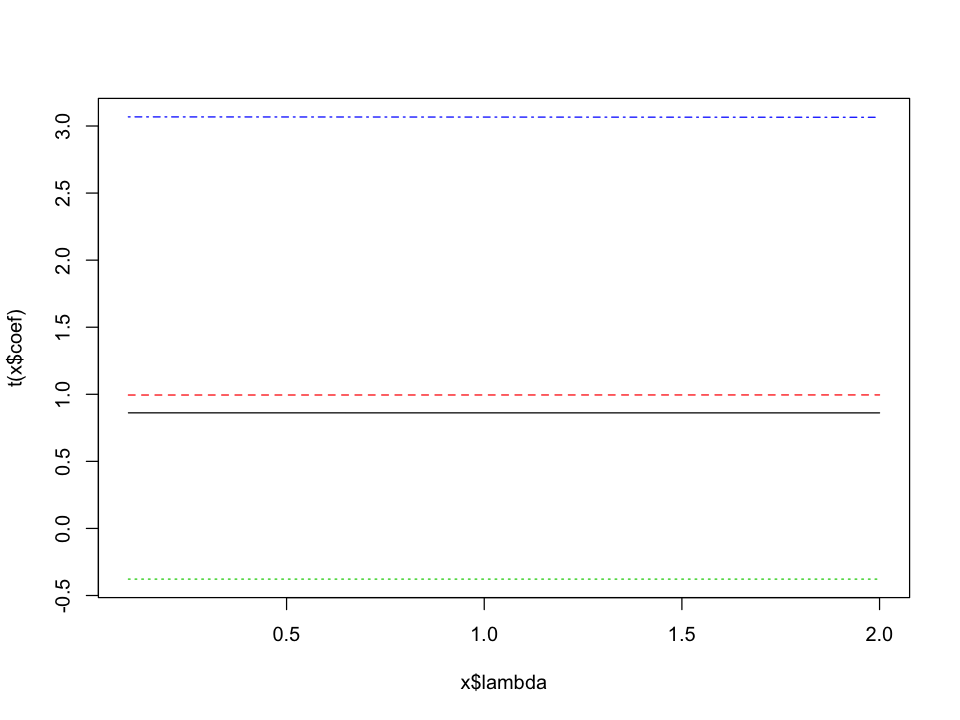

In [49]:
library(lmridge)
library(MASS)
lm_ridge = lm.ridge(normalized_used_price ~ screen_size + battery + days_used + normalized_new_price, data = train, lambda = seq(0.1,2,0.1))
plot(lm_ridge, main = 'Ridge regression plot')
summary(lm_ridge)

In [44]:
select(lm_ridge)

modified HKB estimator is 1.100674 
modified L-W estimator is 0.6693175 
smallest value of GCV  at 2 


In [45]:
lm_ridge_final = lm.ridge(normalized_used_price ~ screen_size + battery + days_used + normalized_new_price, data = train, lambda = 0.5)
lm_ridge_final

                              screen_size              battery 
        -14.93134551           3.24336734           2.34070904 
           days_used normalized_new_price 
         -0.01600909           5.11413167 

In [46]:
glm_model = glm(normalized_used_price ~ screen_size + battery + days_used + normalized_new_price, data = train, family = "poisson")
summary(glm_model)
# output- warnings only

Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 51.399662”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.545637”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.927939”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.761532”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 37.490334”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.220883”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.188746”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 47.101606”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.772488”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.251366”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 37.476199”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.067671”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.324424”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 38

“non-integer x = 46.046701”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.431340”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 37.825975”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.220112”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.697612”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.348040”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.583339”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 35.862929”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.804147”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.776235”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.217753”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 47.204612”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.090336”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.371600”Warning message in dpois(y, mu, log =

“non-integer x = 44.614153”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.610682”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.335266”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.556648”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.023068”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.048419”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.789337”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.491288”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.188746”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 46.226171”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 35.351454”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 47.499629”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.990004”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 47.828979”Warning message in dpois(y, mu, log =

“non-integer x = 43.259852”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.937417”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.740584”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 34.423393”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 33.484996”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 51.795338”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 53.341670”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.761239”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.388581”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.876170”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 48.447381”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 34.895135”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.690680”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.294699”Warning message in dpois(y, mu, log =

“non-integer x = 35.835189”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 54.764636”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.496374”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 37.581723”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 38.716176”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.885398”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.814194”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.056854”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.114088”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.588539”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.419021”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 56.139307”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.466364”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.525890”Warning message in dpois(y, mu, log =

“non-integer x = 50.196611”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.896372”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 37.848712”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 52.732559”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 37.572388”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.801737”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.061093”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 35.403794”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.640673”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 48.195555”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 47.036571”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.419401”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 46.792567”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 53.605877”Warning message in dpois(y, mu, log =

“non-integer x = 48.805266”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.572215”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 48.373131”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 37.880458”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 55.834587”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 52.966660”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 52.021919”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.124112”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 55.301035”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.042443”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.333137”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.667412”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.955105”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.934355”Warning message in dpois(y, mu, log =

“non-integer x = 47.654165”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 49.716865”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 35.885065”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 51.097564”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.855554”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 35.371841”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.712184”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 48.701464”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.624615”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.516696”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 46.732960”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.286716”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.491728”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 36.602227”Warning message in dpois(y, mu, log =

“non-integer x = 33.418012”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 46.074675”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.866198”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.098206”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.616935”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.472290”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 46.852744”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 35.351454”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.397428”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.797882”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.295508”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.940112”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.131345”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 49.156651”Warning message in dpois(y, mu, log =

“non-integer x = 43.081110”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 49.035696”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.550408”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.375637”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 37.276193”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.952451”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.737979”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.880087”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.430259”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.947084”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.483592”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.653893”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 55.723061”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.389886”Warning message in dpois(y, mu, log =

“non-integer x = 45.159017”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.123133”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.262496”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.784700”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.284239”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.733597”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.217280”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.286131”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 46.366689”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 46.260507”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.864679”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.564524”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 48.937269”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 37.167378”Warning message in dpois(y, mu, log =

“non-integer x = 43.447141”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 48.797670”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 38.458832”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 33.414474”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 33.307749”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.300334”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.223662”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 49.196159”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 38.396673”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.453535”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.175404”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.854720”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.304596”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.692321”Warning message in dpois(y, mu, log =

“non-integer x = 44.457054”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 36.961033”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.430519”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.655632”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 47.901549”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.874412”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 38.340615”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 48.553061”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 36.293948”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.027128”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.026944”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.442786”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.297187”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.661323”Warning message in dpois(y, mu, log =

“non-integer x = 46.402477”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.138573”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.972854”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 30.459500”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.748761”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.827779”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.976724”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.913200”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 46.982962”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.673645”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 46.803704”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 49.580078”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 53.428126”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.204995”Warning message in dpois(y, mu, log =

“non-integer x = 57.142937”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.914769”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.958434”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 34.861511”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.991177”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 51.769968”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 35.476039”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.153405”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 48.862807”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.508528”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 36.060412”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.461311”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.751754”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.401143”Warning message in dpois(y, mu, log =

“non-integer x = 48.217321”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.325995”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 49.982253”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.196548”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.276410”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 35.973123”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 37.894033”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.503972”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.751372”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.080987”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.197522”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.395877”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 49.790070”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.437202”Warning message in dpois(y, mu, log =

“non-integer x = 42.416145”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 47.399633”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 37.686144”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.239221”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.594352”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.407509”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 46.235011”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 34.647980”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 49.418567”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.059437”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 38.985324”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 33.857453”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.184712”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 49.976851”Warning message in dpois(y, mu, log =

“non-integer x = 55.702130”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 51.818397”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 47.591780”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.519052”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 38.514234”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 43.688147”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.472530”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 38.316803”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 51.974468”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 46.497611”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.375978”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 48.683802”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.217753”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 53.804502”Warning message in dpois(y, mu, log =

“non-integer x = 41.981038”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.461630”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 32.958369”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.433391”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.477529”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.242269”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 49.064593”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.643482”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.188746”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 36.648429”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 48.484300”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.654391”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 40.040551”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 55.983849”Warning message in dpois(y, mu, log =

“non-integer x = 42.351205”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.065973”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 50.736101”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 52.026871”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.800575”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 47.141143”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 42.317850”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.819221”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.606067”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 39.502817”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 41.663551”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 36.735120”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 44.159449”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 45.728536”Warning message in dpois(y, mu, log =


Call:
glm(formula = normalized_used_price ~ screen_size + battery + 
    days_used + normalized_new_price, family = "poisson", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.63488  -0.23697   0.04239   0.27438   1.86168  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           2.3970574  0.0834949  28.709  < 2e-16 ***
screen_size           0.0747716  0.0187908   3.979 6.92e-05 ***
battery               0.0578664  0.0123925   4.669 3.02e-06 ***
days_used            -0.0002949  0.0001538  -1.917   0.0552 .  
normalized_new_price  0.1146762  0.0059796  19.178  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1286.50  on 2253  degrees of freedom
Residual deviance:  332.76  on 2249  degrees of freedom
AIC: Inf

Number of Fisher Scoring iterations: 3


In [47]:
# GLM is not appropriate for this data as AIC value is INF and our target label isn't some count(poisson) or binomial

In [48]:
# GAM - Not required as the relationship between predictors and response is linear.